In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.family'] = 'sans-serif'
# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Okay! We're going back to our bike path dataset here. I live in Montreal, and I was curious about whether we're more of a commuter city or a biking-for-fun city -- do people bike more on weekends, or on weekdays?

# 4.1 新增 星期（weekday）的列


首先载入数据，指定时间索引并解析

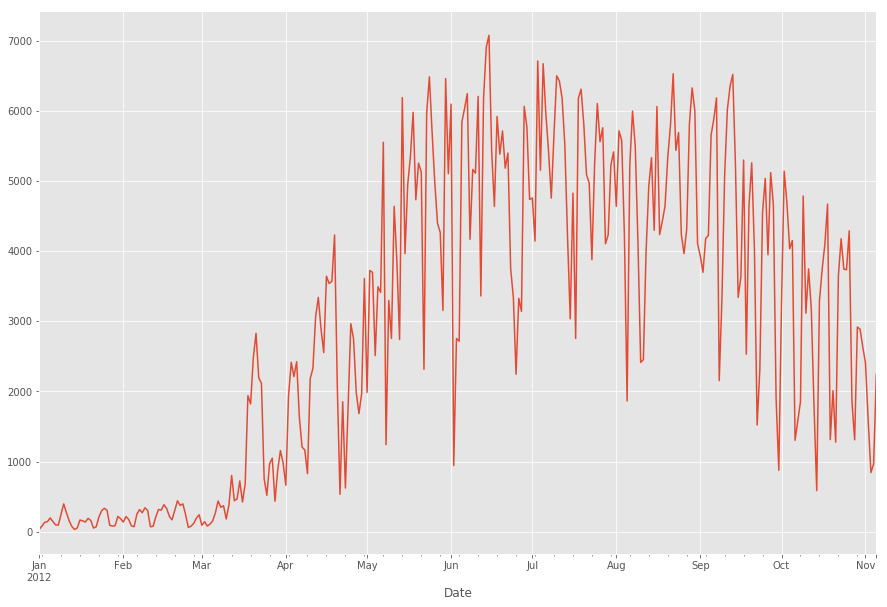

In [23]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

In [24]:
berri_bikes = bikes[['Berri 1']].copy()

In [25]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197




根据时间索引来衍生日期

In [38]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

Pandas 有很多 时间序列的相关函数来提取时间信息


得到多少号

In [39]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

得到星期几

In [40]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

In [41]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 按照星期分组求和

学习groupby 函数， 默认以分组项作为索引

In [43]:
help(berri_bikes.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis=0, level=None, as_index:bool=True, sort:bool=True, group_keys:bool=True, squeeze:bool=False, observed:bool=False) -> 'groupby_generic.DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the


In [34]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


重新赋值索引

In [36]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


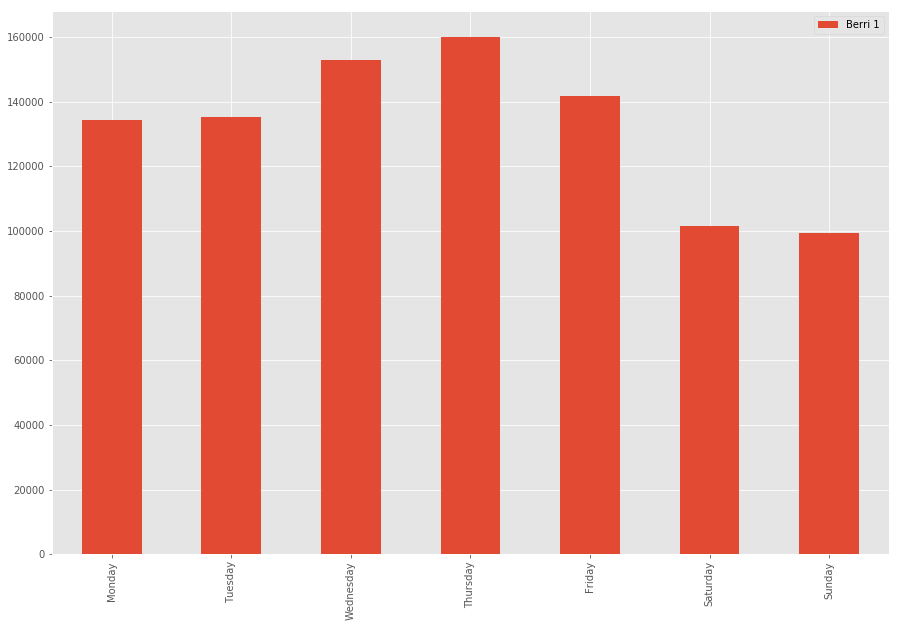

In [37]:
weekday_counts.plot(kind='bar')